# Modulos

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from plotly.subplots import make_subplots
import plotly.graph_objects as go


from scipy.stats import wrapcauchy
from scipy.stats import levy_stable
from IPython.core.magics import auto
from numpy.random.mtrand import beta
import plotly.express as px
import plotly.graph_objs as goo


# Clases

In [2]:
################# http://www.pygame.org/wiki/2DVectorClass ##################
class Vec2d(object):
    """2d vector class, supports vector and scalar operators,
       and also provides a bunch of high level functions
       """
    __slots__ = ['x', 'y']

    def __init__(self, x_or_pair, y = None):
        if y == None:
            self.x = x_or_pair[0]
            self.y = x_or_pair[1]
        else:
            self.x = x_or_pair
            self.y = y

    # Addition
    def __add__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x + other.x, self.y + other.y)
        elif hasattr(other, "__getitem__"):
            return Vec2d(self.x + other[0], self.y + other[1])
        else:
            return Vec2d(self.x + other, self.y + other)

    # Subtraction
    def __sub__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x - other.x, self.y - other.y)
        elif (hasattr(other, "__getitem__")):
            return Vec2d(self.x - other[0], self.y - other[1])
        else:
            return Vec2d(self.x - other, self.y - other)

    # Vector length
    def get_length(self):
        return math.sqrt(self.x**2 + self.y**2)

    # rotate vector
    def rotated(self, angle):
        cos = math.cos(angle)
        sin = math.sin(angle)
        x = self.x*cos - self.y*sin
        y = self.x*sin + self.y*cos
        return Vec2d(x, y)

# Actividad 1: Lévy distribution - N Curves (3 pts)
- Generar al menos las 4 curvas de distribución timpo Lévy stable que se observan en la imagen.

- Visualizar con plotly.

- Parametros m = 3.0, Levy_exponent = x, beta = 0

In [42]:
# Parametros
resolution = 400 # Resolucion
aux_domain = np.linspace(-10, 10, resolution)
x = [0.5, 1.0, 2.0] # Valores de levy exponent
beta = 0.0 # Parametro de asimetria
m = 3.0 # Parametro de ubicacion

fig = go.Figure()


# Distribucion levy estable
for exponent in x:
  levy_pdf = levy_stable.pdf(aux_domain, exponent, beta, m)
  trace = go.Scatter(x=aux_domain, y=levy_pdf, mode='lines', name=f'exponent')
  fig.add_trace(trace)


# Propiedades de la figura
  fig.update_layout(
      title='Distribution Levy Stable',
      xaxis_title='Time',
      yaxis_title='Resultados',
      showlegend=True)


fig.show()


# Actividad 2: Lévy distribution - Histogram + Curve (4 pts)
- A partir de un conjunto de valores aleatorios extraidos de una distribución tipo Lévy stable, obtener su histograma y comparar con la curva correspondiente PDF.
- Visualizar con matplotlib.

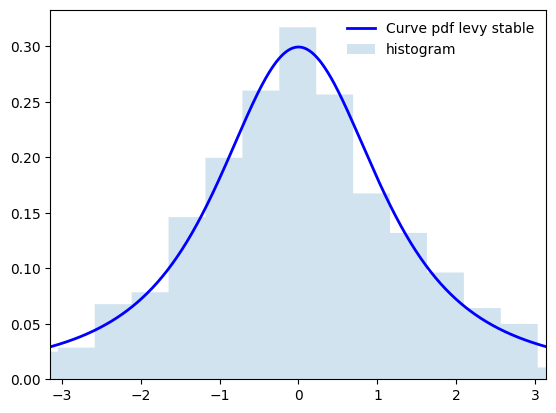

In [ ]:
# Init parameters
resolution = 600
levy_exponent = 1.2
beta = 0
aux_domain = np.linspace(-np.pi, np.pi, resolution)

# Creacion de la figura utilizando matplotlib
plt_figure = plt.figure()
subplot = plt_figure.add_subplot(111)

# Obtencion de la distribucion pdf a traves de levy stable
levy_pdf = np.array([levy_stable.pdf(i, levy_exponent, beta) for i in aux_domain])

# Creacion de datos aleatorios
levy_data = levy_stable.rvs(levy_exponent, beta, size=resolution)

# Limites eje x y grafica de la curva pdf en azul
subplot.set_xlim(aux_domain[0], aux_domain[-1])
subplot.plot(aux_domain, levy_pdf, 'b-', lw=2, label='Curve pdf levy stable')

#Creacion de histograma
subplot.hist(levy_data, density=True, bins='auto', histtype='stepfilled', alpha=0.2, label='histogram')
subplot.legend(loc='best', frameon=False)

# Nombres de los ejes
plt.title=('Curva PDF levy stable')
plt.xlabel=('Valor')
plt.ylabel=('Densidad')






# Actividad 3: Lévy ﬂight - Vec2d - 1 Trajectory (6 pts)
- Utilizar Vec2d.
- Guardar trayectorias en Pandas Data Frame.
- Visualizar proyección en 3d con plotly

In [16]:
#Init parameters
n_steps = 1000
cauchy_param = 0.6
levy_alpha = 1.2
beta = 0
std_steps = 2
vel = 4

# init velocity vector
initial_velocity = Vec2d(vel, 0)

#Creacion del dataFrame
trajectory_df = pd.DataFrame(columns=["x_pos", "y_pos"])
temp_df = pd.DataFrame([{"x_pos": 0, "y_pos": 0}])
trajectory_df = pd.concat([trajectory_df, temp_df], ignore_index=True)

step_index = 1
while step_index < n_steps:
  angle = wrapcauchy.rvs(c=cauchy_param)
  current_velocity = initial_velocity.rotated(angle)

  n_substeps = abs(int(levy_stable.rvs(alpha=levy_alpha, beta=beta, loc=std_steps)))
  if step_index + n_substeps > n_steps:
    n_substeps = n_steps - step_index

  substep_count = 0
  while substep_count < n_substeps:
    temp_df = pd.DataFrame(
        [{"x_pos": trajectory_df.x_pos[step_index - 1] + current_velocity.x,
          "y_pos": trajectory_df.y_pos[step_index - 1] + current_velocity.y}]
    )
    trajectory_df = pd.concat([trajectory_df, temp_df], ignore_index=True)
    substep_count = substep_count + 1
    step_index = step_index + 1
print(trajectory_df)
t=np.linspace(0,1,n_substeps)

#Creacion de la grafica 3D
fig = go.Figure(data=go.Scatter3d(
    x=trajectory_df.x_pos,
    y=trajectory_df.y_pos,
    z=np.linspace(0, 1, n_steps),
    line=dict(width=3),
    name='Trajectory',
    showlegend=True,
    mode="lines"
))

fig.update_layout(
    title='Trajectory Lévy Flight',
    xaxis_title='X',
    yaxis_title='Y',
    scene_zaxis_title='Time'
)

fig.show()











           x_pos       y_pos
0              0           0
1      -2.780288     2.87576
2      -5.560577     5.75152
3      -8.340865     8.62728
4     -11.121154    11.50304
..           ...         ...
995  2676.108426 -213.337947
996   2679.50953 -211.232599
997  2681.992566 -208.096593
998  2685.671895  -209.66584
999  2689.351225 -211.235087

[1000 rows x 2 columns]


## Actividad 4: Correlated Random Walk - Vec2d - N Trajectories (7 pts)

* Generar tantas trayectorias tipo CRW como se especifique en una variable **n_traj**.
* Cada una de las trayectorias debera tener un coeficiente de Cauchy diferente.
* Utilizar **Vec2d**.
* Guardar trayectorias en **Pandas** Data Frame.
* Visualizar proyección en 3d con **plotly**.
* Exportar el Data Frame con las trayectorias a un archivo tipo *pkl*.

In [53]:
# Init parameters
n_trajectories = 4
n_steps = 500
std_cauchy = 0.4
lvw_alpha = 1.2
beta = 0
std_steps = 3
speed = 6

# DataFrame para las trayectorias y figura plotly
all_trajectories_df = pd.DataFrame(columns=["x_pos", "y_pos", "trajectory_id"])


fig = go.Figure()

# Rango para el eje Z
aux_zdomain = np.linspace(0, 1, n_steps)

for trajectory_id in range(n_trajectories):
    # vector de velocidad y alamacenamiento de la trayectoria actual
    velocity = Vec2d(speed, 0)


    current_trajectory_df = pd.DataFrame(columns=["x_pos", "y_pos"])

    # Posición inicial
    current_trajectory_df = pd.concat([current_trajectory_df, pd.DataFrame([{"x_pos": 0, "y_pos": 0}])],
                                      ignore_index=True)

    step_index = 1
    while step_index < n_steps:

      # Angulo del paso actual
        angle = wrapcauchy.rvs(c=std_cauchy)
        velocity = velocity.rotated(angle)

        # Longitud del paso actual
        step_length = abs(math.floor(levy_stable.rvs(alpha=lvw_alpha, beta=beta, loc=std_steps)))

        if step_index + step_length > n_steps:
            step_length = n_steps - step_index

        substep_count = 0
        while substep_count < step_length:
          new_position = pd.DataFrame([{"x_pos": current_trajectory_df.x_pos[step_index - 1] + velocity.x,
                                          "y_pos": current_trajectory_df.y_pos[step_index - 1] + velocity.y}])
          current_trajectory_df = pd.concat([current_trajectory_df, new_position], ignore_index=True)
          substep_count = substep_count + 1
          step_index = step_index + 1

    # Identificador de la trayectoria y trayectoria actual al dataframe
    current_trajectory_df["trajectory_id"] = trajectory_id


    all_trajectories_df = pd.concat([all_trajectories_df, current_trajectory_df], ignore_index=True)

    # Trayectoria en 3D
    fig.add_trace(go.Scatter3d(
        x=current_trajectory_df.x_pos,
        y=current_trajectory_df.y_pos,
        z=aux_zdomain,
        line=dict(width=3),
        name=f'Trayectoria {trajectory_id}',
        showlegend=True,
        mode="lines"
    ))

#  Trayectorias en archivos pickle
for trajectory_id in range(n_trajectories):
    current_trajectory = all_trajectories_df[all_trajectories_df["trajectory_id"] == trajectory_id]
    current_trajectory.to_pickle(f"./trayectoria_{trajectory_id}.pkl")

# Visualización 3D
fig.update_layout(
    title='Trajectories CRW',
    xaxis_title='X',
    yaxis_title='Y',
    scene_zaxis_title='Time'
)

fig.show()









